# Brain wordcloud

Arvid Lundervold, modified from https://amueller.github.io/word_cloud/auto_examples/masked.html

**Using a mask (e.g. https://openclipart.org/detail/238389/brain-silhouette-2) and text we can generate a wordcloud**

In [8]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS   # https://amueller.github.io/word_cloud

d = path.dirname('__file__')

# Read the whole text.
# Convert LaTeX file to plain text using:  $ detex file.tex > file_tex.txt
# https://stackoverflow.com/questions/829408/extract-text-from-tex-remove-latex-tags
# with a minor editing in emacs ...   
text = open(path.join(d, 'Manuscript_plosone_tex.txt')).read()

# read the mask image
brain_mask = np.array(Image.open(path.join(d, "brain-silhouette.png")))

# invert mask
brain_mask = np.max(brain_mask) - brain_mask
w, h = brain_mask.shape
brain_mask_rgb = np.empty((w, h, 3), dtype=np.uint8)
# make mask in RGB space
brain_mask_rgb[:, :, 0] = brain_mask
brain_mask_rgb[:, :, 1] = brain_mask
brain_mask_rgb[:, :, 2] = brain_mask

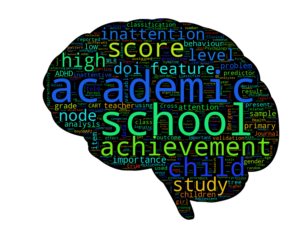

In [9]:
stopwords = set(STOPWORDS)
stopwords.add("said")

bg_color = 'black'  # 'white', 'black', ...
maxwords = 5000 # 2000
wc = WordCloud(background_color=bg_color, max_words=maxwords, mask=brain_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "brain-plosone-wordcloud.png"))

# show

f = plt.figure()
# Setting black background outside brain mask:
# plt.imshow(wc, interpolation='bilinear')
# Setting white background outside brain mask:
plt.imshow(wc + brain_mask_rgb, interpolation='bilinear')
plt.axis("off")
f.savefig("brain_mask-plosone-wordcloud.pdf", bbox_inches='tight')
#plt.figure()
#plt.imshow(brain_mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.axis("off")
plt.show()